In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="password",
    database="olist"
)

In [3]:
best_selling_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
        COUNT(products.product_id) AS count_sales
    FROM
    	order_items
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	count_sales DESC;
"""

In [4]:
best_selling_df = pd.read_sql(best_selling_sql, conn)
best_selling_df = best_selling_df.set_index("category_name")
best_selling_df.to_csv("best_selling.csv", header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_29864\1214026449.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  best_selling_df = pd.read_sql(best_selling_sql, conn)


In [5]:
best_selling_df = best_selling_df.head(10)

In [6]:
best_selling_df

,count_sales
category_name,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
housewares,6964
watches_gifts,5991
telephony,4545
garden_tools,4347


In [7]:
best_selling_df = best_selling_df.sort_values(by="count_sales", ascending=True)

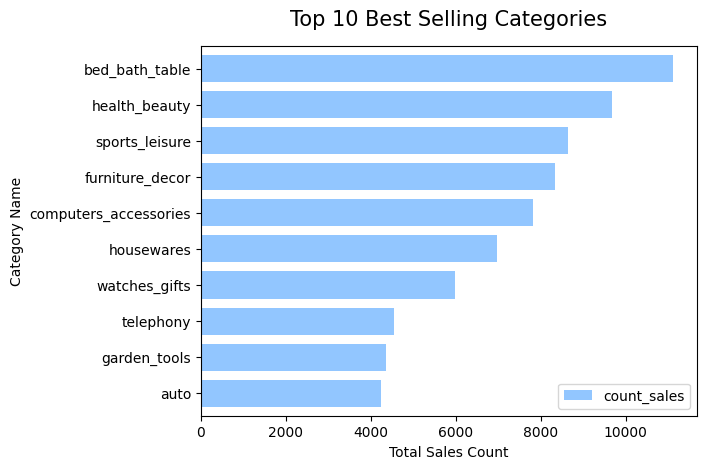

In [8]:
plt.style.use("seaborn-v0_8-pastel")
best_selling_df.plot(kind="barh", width=0.75)
plt.title("Top 10 Best Selling Categories", size=15, pad=15)
plt.xlabel("Total Sales Count")
plt.ylabel("Category Name")
plt.legend(loc="lower right")
plt.savefig("best_selling.png", bbox_inches='tight')